# Face Detection

Detecting faces using Viola-Jones algorithm w/ Haar Cascade.

**Remember!** *Face detection* != *Face recognition*

[More here](https://en.wikipedia.org/wiki/Haar-like_feature)



## How To Use

Viola-Jones uses features to detect a face, the main feature types are:

- Edge Features
- Line Features
- Four-Rectangele Features

Each feature is a single values extracted by subtracting the sum of white pixels from the sum of black pixels.

The algorithm flow is like:

1. person-front-facing
1. grayscale
1. analyses eyes and cheeks (if it fails the alg stop)
1. analises nouse
1. analises mounth and eyebrows
1. ...

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
nadia_img = cv.imread("../assets/Nadia_Murad.jpg",0)
denis_img = cv.imread("../assets/Denis_Mukwege.jpg",0)
solvay_img = cv.imread("../assets/solvay_conference.jpg",0)

## Basic Face Detection

In [5]:
face_haarcascade = cv.CascadeClassifier("../assets/haarcascades/haarcascade_frontalface_default.xml")

In [7]:
def detect_face(img):
    face_img = img.copy()
    face_rectangles = face_haarcascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rectangles:
        pt1 = (x,y)
        pt2 = (x+w,y+h)
        cv.rectangle(face_img, pt1, pt2, (255,255,255), 10)
    return face_img

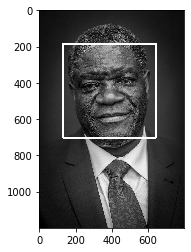

In [8]:
result = detect_face(denis_img)
plt.imshow(result, cmap='gray')

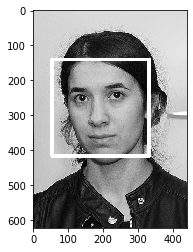

In [9]:
result = detect_face(nadia_img)
plt.imshow(result, cmap='gray')

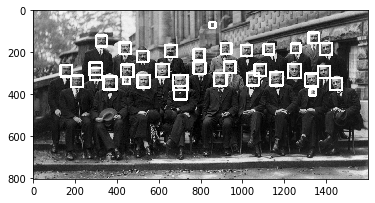

In [10]:
result = detect_face(solvay_img)
plt.imshow(result, cmap='gray')

## Improving Multi Face Detection

In [14]:
def improved_detect_face(img):
    face_img = img.copy()
    face_rectangles = face_haarcascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)

    for (x,y,w,h) in face_rectangles:
        pt1 = (x,y)
        pt2 = (x+w,y+h)
        cv.rectangle(face_img, pt1, pt2, (255,255,255), 10)
    return face_img

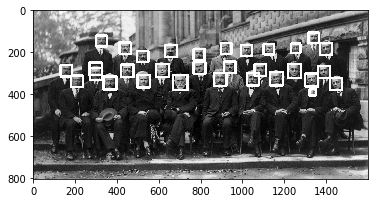

In [15]:
result = improved_detect_face(solvay_img)
plt.imshow(result, cmap="gray")

## Basic Eye Detection

In [18]:
eyes_haarcascade = cv.CascadeClassifier("../assets/haarcascades/haarcascade_eye.xml")

def detect_eyes(img):
    face_img = img.copy()
    face_rectangles = eyes_haarcascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5)

    for (x,y,w,h) in face_rectangles:
        pt1 = (x,y)
        pt2 = (x+w,y+h)
        cv.rectangle(face_img, pt1, pt2, (255,255,255), 10)
    return face_img

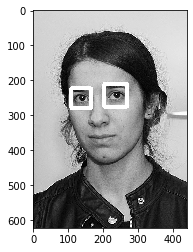

In [19]:
result = detect_eyes(nadia_img)
plt.imshow(result, cmap='gray')

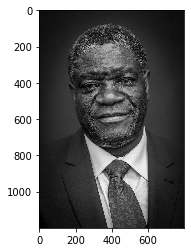

In [20]:
result = detect_eyes(denis_img)
plt.imshow(result, cmap='gray')

##  Detection From Video

In [24]:
def improved_detect_face(img):
    face_img = img.copy()
    face_rectangles = face_haarcascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=7)

    for (x,y,w,h) in face_rectangles:
        pt1 = (x,y)
        pt2 = (x+w,y+h)
        cv.rectangle(face_img, pt1, pt2, (255,255,255), 10)
    return face_img

capture = cv.VideoCapture(0)

while True:
    ret, frame = capture.read(0)
    frame = improved_detect_face(frame)
    cv.imshow('Face Detection', frame)
    
    key = cv.waitKey(1)
    if key == 27:
        break

capture.release()
cv.destroyAllWindows()